In [9]:
%matplotlib inline

import numpy as np  # for mathematical functions and arrays
import matplotlib.pyplot as plt  # for plot

## Opening a file / reading text from a file

In [37]:
## To open a file, we use a numpy function loadtxt
# This function need the file to be only 1 big matrix (not several matrices in the same file)
# I splitted by hand the file to 3 different files (1, 2, 3)
# If you want to try to load the original file, you can make a function with 
# with open(fname) as f:: f.readlines() ... and then checking the text obtained to get the 3 data sets and split lines in rows. 

# Example of use of loadtxt:
fname = "inner_edge_school_1.txt"
print(np.loadtxt(fname,skiprows=1)[:3,:])  #skiprows allows to skip the first line (header). If header has a "#", it would have been skipped anyway.
# [:3,:] means we are only printing the first 3 lines! 

#Example of using readline (to read the header)
with open(fname) as f:
    header = f.readline() #read only 1 line once. Repeating readlines(), the system will read the second lines, then third lines, etc.
    #readlines() would read all lines!
    print(header)

    print(header.split()) #split allow us to split using white spaces! Good for naming the axis.

[[  1.10040000e+02   1.15850000e-08   2.00000000e+02   1.65680000e-06
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.57850000e+00
    3.30000000e-04]
 [  1.08280000e+02   1.55320000e-08   2.00000000e+02   1.65680000e-06
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.57850000e+00
    3.30000000e-04]
 [  1.06530000e+02   2.07780000e-08   2.00000000e+02   1.65680000e-06
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.57850000e+00
    3.30000000e-04]]
     ALT          P          T          FH2O           O3           THEAT        TCOOL        PSATCO2        FCO2

['ALT', 'P', 'T', 'FH2O', 'O3', 'THEAT', 'TCOOL', 'PSATCO2', 'FCO2']


In [16]:
# to get the header names.
with open(fname) as f:
    header = f.readline()
    header = header.split()  
print(header)
# The goal is to plot 

['ALT', 'P', 'T', 'FH2O', 'O3', 'THEAT', 'TCOOL', 'PSATCO2', 'FCO2']


## Loading data from the files

In [36]:
# Let's start with loading all data sets. 

# names of files
fnames = ["outer_edge_school.txt"]
fnames = ["inner_edge_school_1.txt", "inner_edge_school_2.txt", "inner_edge_school_3.txt", "outer_edge_school.txt"]

data_ie_1, data_ie_2, data_ie_3, data_oe = {}, {}, {}, {}
data = [{}, {}, {}, {}]
# dictionnary (so we don't have to worry about giving a proper name)

for i, filename in enumerate(fnames): 
    data[i]["fname"] = filename
    with open(filename) as f:
        header = f.readline()
        header = header.split()
    data[i]["header"] = header
    
    all_values = np.loadtxt(filename,skiprows=1)
    for j, col in enumerate(header): #to take all columns
        data[i][col] = all_values[:,j]
    
        
# to get a value: data[file number][value_name]
# file number is between 0 and 3. 0 to 2: inner edge. 3: outer edge.
for d in data:
    print(d["fname"])

inner_edge_school_1.txt
inner_edge_school_2.txt
inner_edge_school_3.txt
outer_edge_school.txt


## Plot of the data sets

Let's first see what's inside the data sets: let's look at one of the data set (example: data[2])

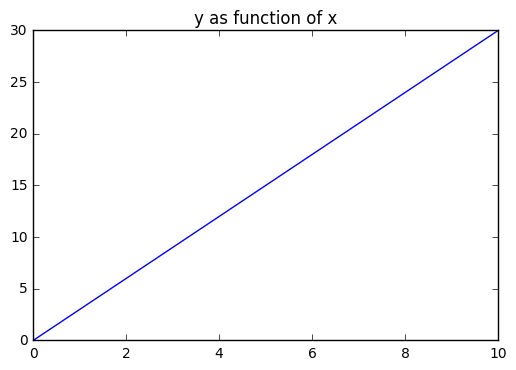

In [52]:
# To plot with matplotlib.pyplot:
x = np.linspace(0, 10, 10) 
y = np.linspace(0, 30, 10)
plt.plot(x, y)
plt.title("y as function of x")

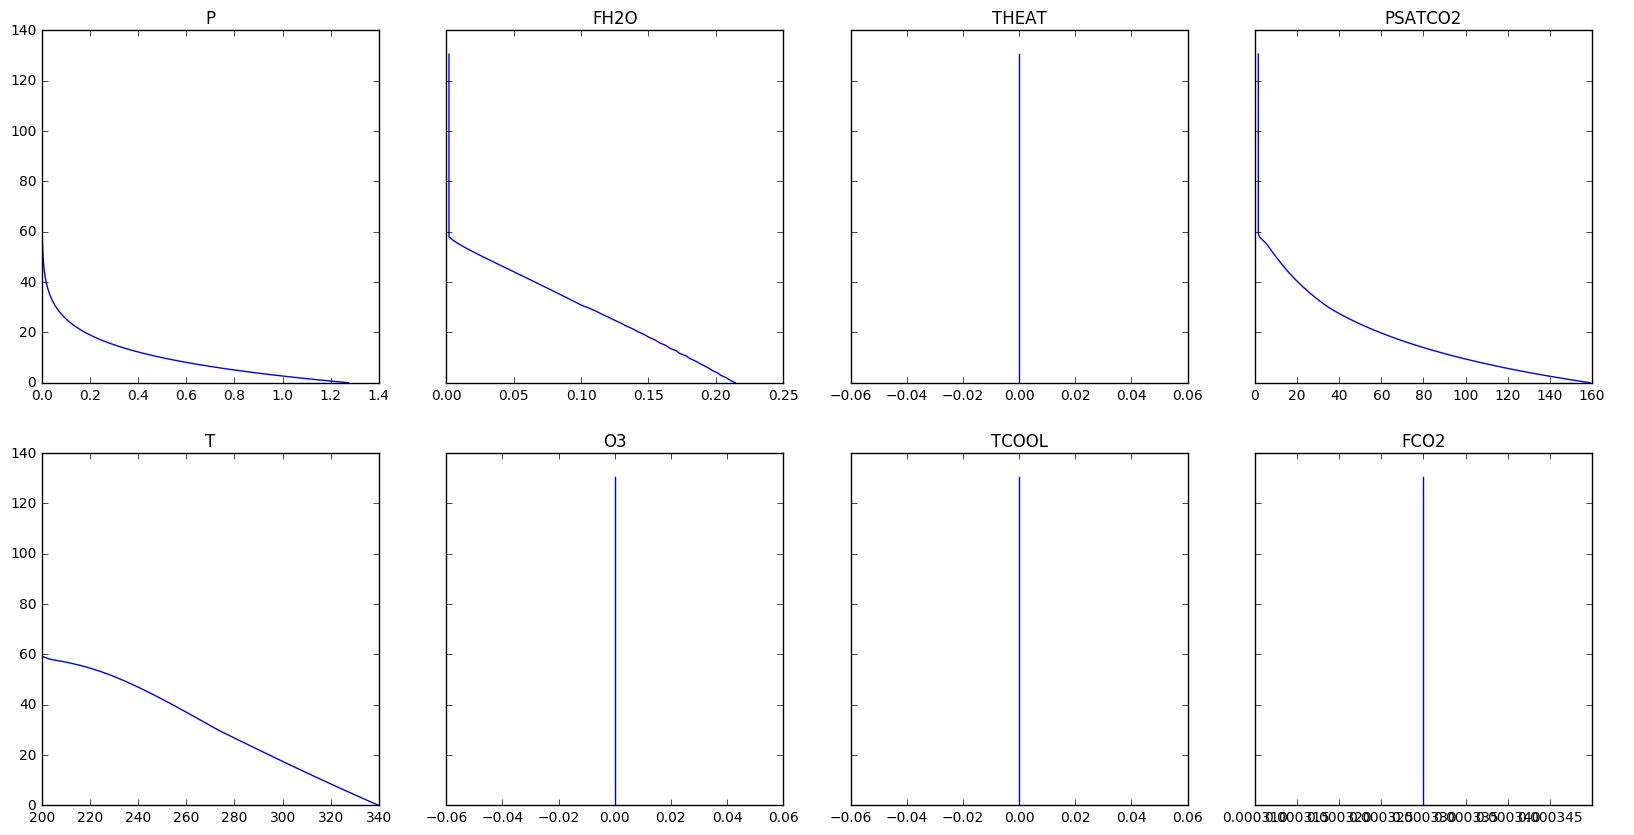

In [53]:
data_0 = data[2]
fig, ax = plt.subplots(2,4, sharey=True, figsize=[20,10])  # to make subplots
# ax will be refered as ax[i, j], with i: line number, j: column number.

header = data_0["header"]
altitude = data_0[header[0]]

for i, variable in enumerate(header[1:]): #The first value is ALT, which is altitude
    ax[i%2, int(i/2)].plot(data_0[variable], altitude)
    ax[i%2, int(i/2)].set_title(variable)

Temperature and FH2O for the three "inner edge" data sets:

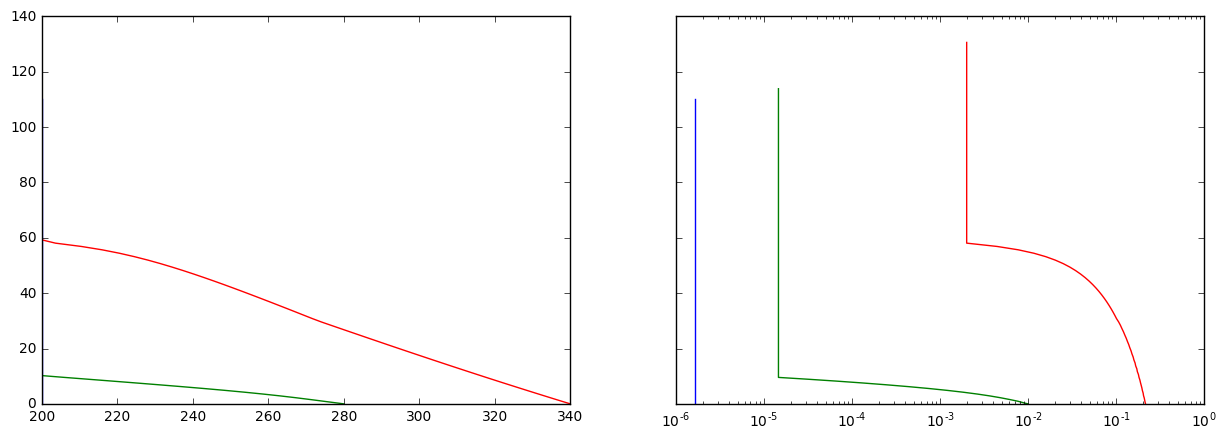

In [60]:
fig, ax = plt.subplots(1,2, sharey = True, figsize=[15, 5])
header = data[0]["header"]

for d in data[:3]: #not the last one
    alt = d[header[0]]
    T = d["T"]
    FH2O = d["FH2O"]
    
    ax[0].plot(T, alt)
    ax[1].semilogx(FH2O, alt)

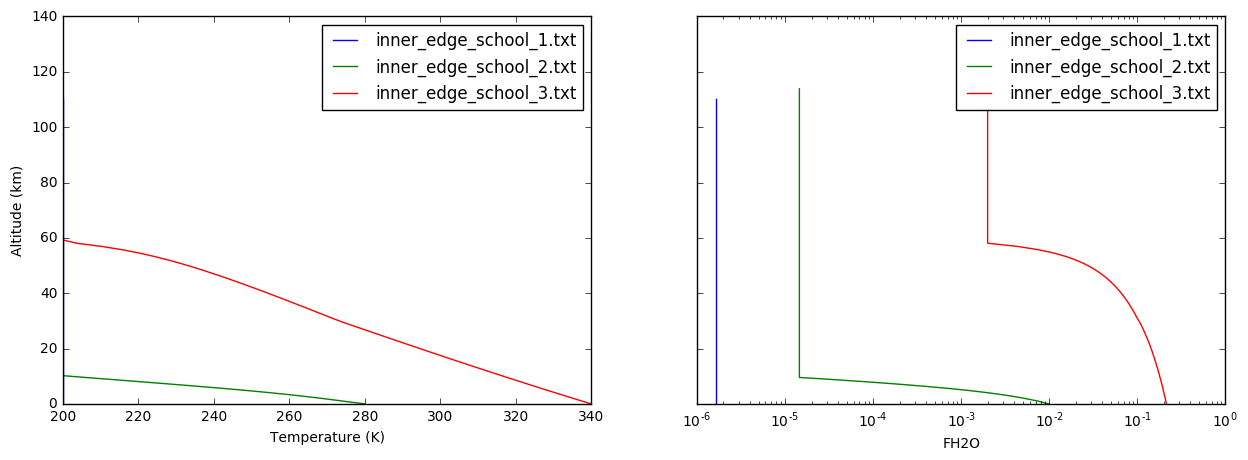

In [71]:
#to make the graph better, let's add some legend!

fig, ax = plt.subplots(1,2, sharey = True, figsize=[15, 5])
header = data[0]["header"]

for d in data[:3]: #not the last one
    alt = d[header[0]]
    T = d["T"]
    FH2O = d["FH2O"]
    
    ax[0].plot(T, alt, label = d["fname"])
    ax[1].semilogx(FH2O, alt, label = d["fname"])
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel("Altitude (km)")
ax[0].set_xlabel("Temperature (K)")
ax[1].set_xlabel("FH2O")

Outer edge

['pCO2(bar)', 'Seff', 'FTIR', 'FTSOL', 'ALBEDO']


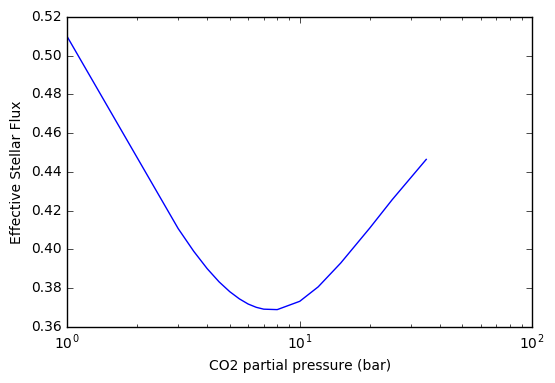

In [78]:
fig, ax = plt.subplots()

d = data[3]
header = d["header"]
print(header)

ax.semilogx(d['pCO2(bar)'], d['Seff'])
ax.set_ylim([0.36, 0.52])
ax.set_ylabel("Effective Stellar Flux")
ax.set_xlabel("CO2 partial pressure (bar)")